In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os 
import seaborn as sns

In [2]:
data_path = "D:\\my_project\\lyrics_semantic_system\\backend\\data\\csv"

In [3]:
csv_file = [os.path.join(data_path, f) for f in os.listdir(data_path) if f.endswith(".csv")]

df_list = []

for file in csv_file:
    artist = os.path.splitext(os.path.basename(file))[0]
    df = pd.read_csv(file)
    df['Artist'] = artist
    df_list.append(df)

# Gộp thành một DataFrame duy nhất
all_lyrics_df = pd.concat(df_list, ignore_index=True)
all_lyrics_df.head(200)

,Artist,Title,Album,Date,Lyric,Year,Unnamed: 0
0,ArianaGrande,"​thank u, next","thank u, next",2018-11-03,thought i'd end up with sean but he wasn't a m...,2018.0,NaN
1,ArianaGrande,7 rings,"thank u, next",2019-01-18,yeah breakfast at tiffany's and bottles of bub...,2019.0,NaN
2,ArianaGrande,​God is a woman,Sweetener,2018-07-13,you you love it how i move you you love it how...,2018.0,NaN
3,ArianaGrande,Side To Side,Dangerous Woman,2016-05-20,ariana grande nicki minaj i've been here all ...,2016.0,NaN
4,ArianaGrande,​​no tears left to cry,Sweetener,2018-04-20,right now i'm in a state of mind i wanna be in...,2018.0,NaN
...,...,...,...,...,...,...,...
195,ArianaGrande,​​no tears left to cry (live),​k bye for now (swt live),2019-12-23,ah ah ooh ain't got no tears left to cry ooh o...,2019.0,NaN
196,ArianaGrande,​you’ll never know (live),​k bye for now (swt live),2019-12-23,now you finally tell me how you feel guess you...,2019.0,NaN
197,ArianaGrande,Better Days - Live from One Love Manchester,One Love Manchester,2017-06-04,ariana grande manchester put your hands up vi...,2017.0,NaN
198,ArianaGrande,​right there (live),​k bye for now (swt live),2019-12-23,ariana grande woo y'all ready to throw it back...,2019.0,NaN


C:\Users\Nam\AppData\Local\Temp\ipykernel_1044\1073477766.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_counts.values, y=artist_counts.index, palette="viridis")


Text(0, 0.5, 'Nghệ sĩ')

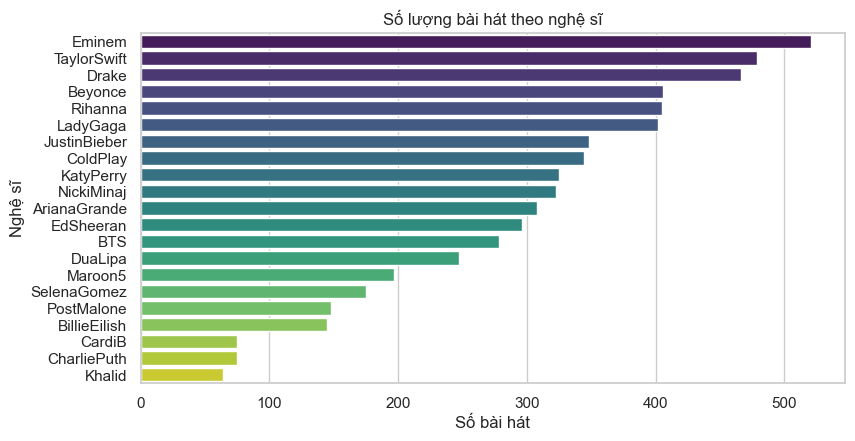

In [4]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
artist_counts = all_lyrics_df['Artist'].value_counts()
sns.barplot(x=artist_counts.values, y=artist_counts.index, palette="viridis")
plt.title("Số lượng bài hát theo nghệ sĩ")
plt.xlabel("Số bài hát")
plt.ylabel("Nghệ sĩ")

C:\Users\Nam\AppData\Local\Temp\ipykernel_1044\2636955972.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_lyric_length.values, y=avg_lyric_length.index, palette="coolwarm")
C:\Users\Nam\AppData\Local\Temp\ipykernel_1044\2636955972.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_lyric_length.values, y=avg_lyric_length.index, palette="coolwarm")
C:\Users\Nam\AppData\Local\Temp\ipykernel_1044\2636955972.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_lyric_length.values, y=avg_lyric_length.index, palette="coolwa

Text(0, 0.5, 'Nghệ sĩ')

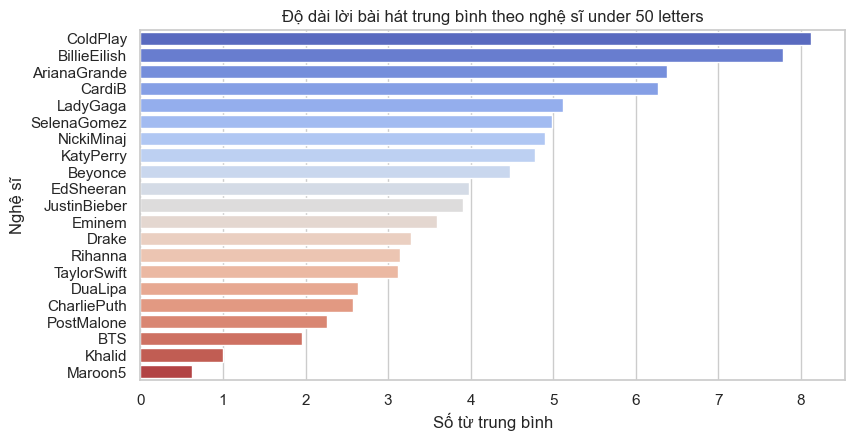

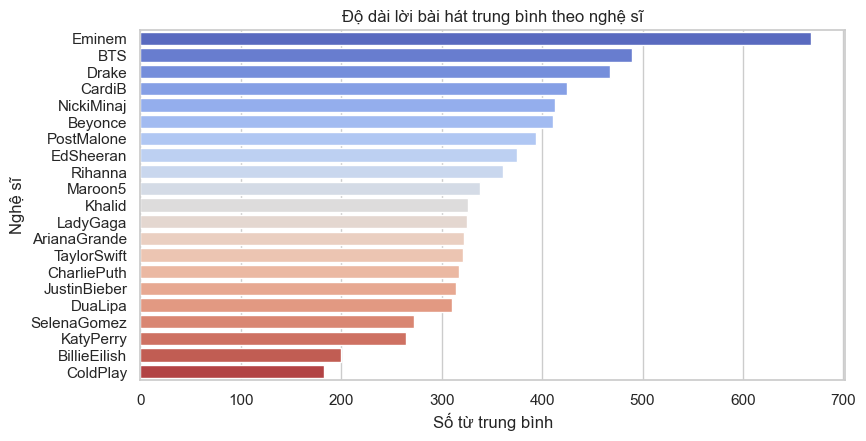

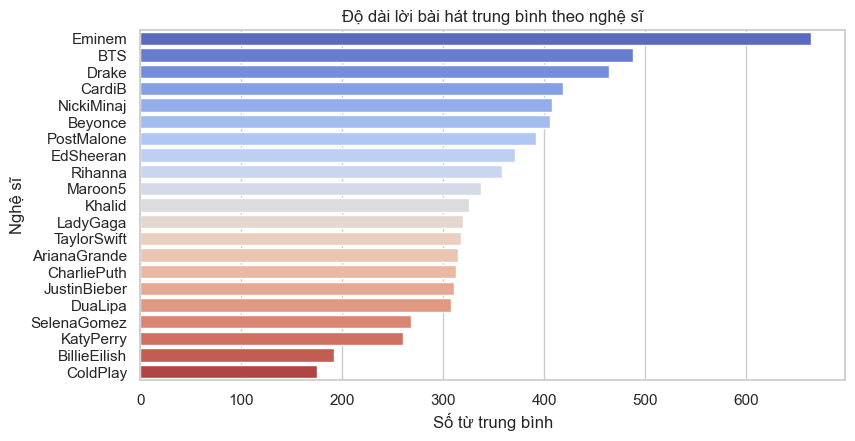

In [5]:
def count_word(text):
    if isinstance(text, str):
        if len(text.strip().split()) > 100:
            return len(text.strip().split())
    return 0

def count_less_word(text):
    if isinstance(text, str):
        if len(text.strip().split()) < 100:
            return len(text.strip().split())
    return 0

plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 2)
all_lyrics_df['LyricLength'] = all_lyrics_df['Lyric'].astype(str).apply(count_less_word)
avg_lyric_length = all_lyrics_df.groupby("Artist")['LyricLength'].mean().sort_values(ascending=False)
sns.barplot(x=avg_lyric_length.values, y=avg_lyric_length.index, palette="coolwarm")
plt.title("Độ dài lời bài hát trung bình theo nghệ sĩ under 50 letters")
plt.xlabel("Số từ trung bình")
plt.ylabel("Nghệ sĩ")


plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 2)
all_lyrics_df['LyricLength'] = all_lyrics_df['Lyric'].astype(str).apply(lambda x: len(x.split()))
avg_lyric_length = all_lyrics_df.groupby("Artist")['LyricLength'].mean().sort_values(ascending=False)
sns.barplot(x=avg_lyric_length.values, y=avg_lyric_length.index, palette="coolwarm")
plt.title("Độ dài lời bài hát trung bình theo nghệ sĩ")
plt.xlabel("Số từ trung bình")
plt.ylabel("Nghệ sĩ")

plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 2)
all_lyrics_df['LyricLength'] = all_lyrics_df['Lyric'].astype(str).apply(count_word)
avg_lyric_length = all_lyrics_df.groupby("Artist")['LyricLength'].mean().sort_values(ascending=False)
sns.barplot(x=avg_lyric_length.values, y=avg_lyric_length.index, palette="coolwarm")
plt.title("Độ dài lời bài hát trung bình theo nghệ sĩ")
plt.xlabel("Số từ trung bình")
plt.ylabel("Nghệ sĩ")